In [39]:
import numpy as np
import pandas as pd
import scipy
import os
import seaborn as sns;
sns.set_style('ticks')

# Gene Expression Dataset

In [17]:
data_table = pd.read_csv('./data/counts.txt', index_col = 0)
data_table.head(5)

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00


The first column gives the name of each gene, and the remaining columns
represent individual samples.


In [19]:
#sample names
data_table.columns

Index(['00624286-41dd-476f-a63b-d2a5f484bb45', 'TCGA-FS-A1Z0', 'TCGA-D9-A3Z1',
       '02c76d24-f1d2-4029-95b4-8be3bda8fdbe', 'TCGA-EB-A51B', 'TCGA-D3-A1Q3',
       'TCGA-FR-A44A', 'TCGA-EE-A17Z', 'TCGA-D3-A51G', 'TCGA-D3-A51E',
       ...
       'TCGA-D9-A149', 'TCGA-EE-A3AG', 'TCGA-D9-A4Z2', 'TCGA-EB-A4OZ',
       'TCGA-EE-A3J4', 'TCGA-FS-A1ZM', 'TCGA-D3-A5GS', 'TCGA-EB-A3XF',
       'TCGA-EE-A2GE', 'ff7431a9-243a-4651-80bb-096379925bbe'],
      dtype='object', length=375)

We will need some information about the lengths of the genes for our normalization.
So that we can take advantage of some fancy pandas indexing, we’re going to set the
index of the pandas table to be the gene names in the first column.

In [18]:
gene_info = pd.read_csv('./data/genes.csv', index_col = 0)
gene_info.head()

,GeneID,GeneLength
GeneSymbol,,
CPA1,1357,1724
GUCY2D,3000,3623
UBC,7316,2687
C11orf95,65998,5581
ANKMY2,57037,2611


Let’s check how well our gene length data matches up with our count data.

In [31]:
f'Genes in gene_info: {gene_info.shape[0]}'

'Genes in gene_info: 20503'

In [33]:
f'Genes in data_table: {data_table.shape[0]}'

'Genes in data_table: 20500'

There are more genes in our gene length data than were actually measured in the
experiment. 

Let’s filter so we only get the relevant genes, and we want to make sure
they are in the same order as in our count data. 

In [35]:
#subset gene info to match the count data
match_index = data_table.index & gene_info.index
match_index

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20500)

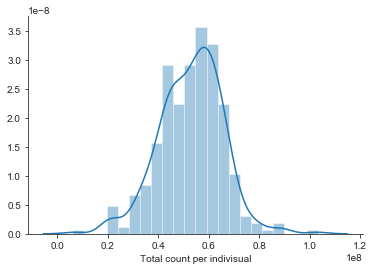

In [55]:
sns.distplot(data_table.sum(0), axlabel = 'Total count per indivisual', norm_hist = True)
sns.despine()